Importing the Dependencies

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Data preparation

In [2]:
#read training dataset
train_data = pd.read_csv("titanic/train.csv")

In [3]:
#display top 5 records of training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape of trainig data
train_data.shape

(891, 12)

In [5]:
#read testing dataset
test_data = pd.read_csv("titanic/test.csv")

In [6]:
#display top 5 records of testing data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#shape of test data
test_data.shape

(418, 11)

In [8]:
#read gender_submission dataset
gender_submission_data = pd.read_csv("titanic/gender_submission.csv")

In [9]:
#display top 5 records of gender_submission data
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
#shape of gender_submission data
gender_submission_data.shape

(418, 2)

In [11]:
#store the value of Survived column in test data from gender_submission data
test_data['Survived']=gender_submission_data['Survived']

In [12]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SURVIVAL CHART')

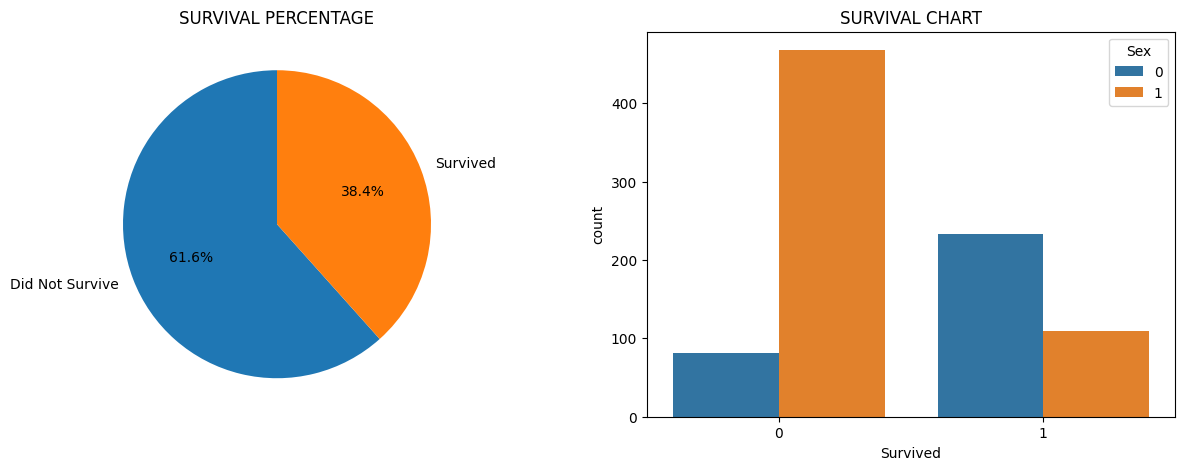

In [46]:
sur = train_data['Survived'].value_counts()
survival_rate = [sur[0]/len(train_data)*100,sur[1]/len(train_data)*100]
fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(survival_rate,labels = ['Did Not Survive','Survived'],autopct='%1.1f%%',startangle = 90,)
plt.title('SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
sns.countplot('Survived',data = train_data,hue = 'Sex')
plt.title('SURVIVAL CHART')

In [13]:
train_data['set'], test_data['set'] = 'train', 'test'
df = pd.concat([train_data, test_data])

In [14]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set               0
dtype: int64

Missing ages

To fill in the missing ages, we can do something more clever then just take the overal median age. The names contain titles of which some are linked to their age. Master is a younger boy (in general). Lets take the median of each age group.

In [15]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [16]:
for title, age in df.groupby('Title')['Age'].median().iteritems():
    df.loc[(df['Title']==title) & (df['Age'].isnull()), 'Age'] = age

Drop features on which passenger will survive or not is not depends

In [17]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'Title'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   set       1309 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 81.8+ KB


Create another feature for family size by adding SibSp and Parch

In [19]:
df['Family'] = df['SibSp'] + df['Parch'] 

Drop the SibSp and Parch features

In [20]:
df = df.drop('SibSp', axis=1)
df = df.drop('Parch', axis=1)

In [21]:
df.loc[:, 'Age'] = pd.qcut(df['Age'], 4, labels=False)

In [22]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
df["Sex"] = np.where(df["Sex"]=='male', 1, 0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   int64 
 1   Pclass    1309 non-null   int64 
 2   Sex       1309 non-null   int32 
 3   Age       1309 non-null   int64 
 4   set       1309 non-null   object
 5   Family    1309 non-null   int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 66.5+ KB


In [25]:
train_data = df.loc[df['set'] == 'train'].drop('set', axis=1).reset_index(drop=True)
test_data = df.loc[df['set'] == 'test'].drop('set', axis=1).reset_index(drop=True)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int64
 4   Family    891 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 31.4 KB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
 1   Pclass    418 non-null    int64
 2   Sex       418 non-null    int32
 3   Age       418 non-null    int64
 4   Family    418 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.8 KB


Spliting of data

In [28]:
X_train = train_data.drop('Survived',axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop('Survived',axis=1)
Y_test = test_data['Survived']

In [29]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [30]:
X_train.shape

(891, 4)

In [31]:
X_train = np.insert(X_train, 4, Y_train, axis=1)

In [32]:
X_test_size = X_test.shape[0]

K-Nearest Neighbors Classifier

In [33]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric="euclidean"):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)
    
      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      #Step 1:Caculate distance    
      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    #Step 2:Sort distance matrix
    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []

    #Step 3:Select K nearest neighbors
    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    
    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class


In [34]:
knn_model = KNN_Classifier()

In [35]:
y_pred = []

for i in range(X_test_size):
  prediction = knn_model.predict(X_train, X_test[i], k=3)
  y_pred.append(prediction)

In [36]:
print(y_pred)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [37]:
def accuracy_score(y_true, y_pred):

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

In [38]:
print(accuracy_score(Y_test, y_pred))

90.19


Naive Bayes Classifier

In [39]:
class naive_bayes_classifier():

    #Calculate P(Y=y) for all possible y
    def calculate_prior(self, df, Y):
        classes = sorted(list(df[Y].unique()))
        prior = []
        for i in classes:
            prior.append(len(df[df[Y]==i])/len(df))
        return prior

    #Calculate P(X=x|Y=y) using Gaussian distance
    def calculate_likelihood_gaussian(self, df, feat_name, feat_val, Y, label):
        feat = list(df.columns)
        df = df[df[Y]==label]
        mean, std = df[feat_name].mean(), df[feat_name].std()
        p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
        return p_x_given_y

    #Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum
    def naive_bayes_gaussian(self, df, X, Y):
        # get feature names
        features = list(df.columns)[1:]

        # calculate prior
        prior = self.calculate_prior(df, Y)

        Y_pred = []
        # loop over every data sample
        for x in X:
            # calculate likelihood
            labels = sorted(list(df[Y].unique()))
            likelihood = [1]*len(labels)
            for j in range(len(labels)):
                for i in range(len(features)):
                    likelihood[j] *= self.calculate_likelihood_gaussian(df, features[i],x[i], Y, labels[j])


            # calculate posterior probability (numerator only)
            post_prob = [1]*len(labels)
            for j in range(len(labels)):
                post_prob[j] = likelihood[j] * prior[j]

            Y_pred.append(np.argmax(post_prob))

        return np.array(Y_pred) 

In [40]:
X_test = test_data.iloc[:,:-1].values
Y_test = test_data.iloc[:,-1].values

In [41]:
nb_model = naive_bayes_classifier()

In [42]:
Y_pred = nb_model.naive_bayes_gaussian(train_data, X_test, Y='Survived')

In [44]:
print(accuracy_score(Y_test,Y_pred))

81.34
